# IMPORTS

In [1]:
%load_ext autoreload
import os, sys
import numpy as np
import CL_inference as cl_inference

from bacco.baryons import emu_pars

%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('default')
plt.close('all')

font, rcnew = cl_inference.plot_utils.matplotlib_default_config()
mpl.rc('font', **font)
plt.rcParams.update(rcnew)
plt.style.use('tableau-colorblind10')
%config InlineBackend.figure_format = 'retina'

# VALIDATE DATASET LOADERS

##### Define what dataset to load

In [2]:
box = 2000
kmax = 0.6
path_save_root = os.path.join("/cosmos_storage/home/dlopez/Projects/CL_inference/DATASETS", "DATASET_kmax_"+str(kmax))

path_load = os.path.join(path_save_root, "TEST")
list_model_names = ['Model_fixed_illustris', 'Model_fixed_eagle']

##### Auxiliar characteristics for plotting

In [3]:
list_corresponding_aug_index = []
for ii, model_name in enumerate(list_model_names):
    loaded_theta, loaded_xx, loaded_aug_params = cl_inference.data_tools.load_stored_data(
        path_load,
        [model_name], 
        include_baryon_params=True
    )
    list_corresponding_aug_index.extend(np.arange(loaded_xx.shape[1]))

In [4]:
kf = 2.0 * np.pi / box
kmin=np.log10(4*kf)
N_kk = int((kmax - kmin) / (8*kf))
kk = np.logspace(kmin, kmax, num=N_kk)

##### Load datasets

In [5]:
loaded_theta, loaded_xx, loaded_aug_params = cl_inference.data_tools.load_stored_data(
    path_load,
    list_model_names, 
    include_baryon_params=True
)

In [6]:
print(loaded_theta.shape)
print(loaded_xx.shape)
print(loaded_aug_params.shape)

(2048, 5)
(2048, 2, 99)
(2048, 2, 7)


##### Define dataset loader

In [7]:
normalize=False
path_save_norm = None
path_load_norm = None
NN_augs_batch = 2
add_noise_Pk="cosmic_var_gauss"

dset = cl_inference.data_tools.data_loader(
    loaded_theta,
    loaded_xx,
    aug_params = loaded_aug_params,
    normalize=normalize,
    path_save_norm=path_save_norm,
    path_load_norm=path_load_norm,
    NN_augs_batch=NN_augs_batch,
    add_noise_Pk=add_noise_Pk,
    kmax=kmax,
)

In [8]:
print("dset.norm_mean ----> ", dset.norm_mean)
print("dset.norm_std ----> ", dset.norm_std)
print("dset.xx.shape ----> ", dset.xx.shape)
print("dset.theta.shape ----> ", dset.theta.shape)
print("dset.NN_augs_batch ----> ", dset.NN_augs_batch)

dset.norm_mean ---->  0.0
dset.norm_std ---->  1.0
dset.xx.shape ---->  (2048, 2, 99)
dset.theta.shape ---->  (2048, 5)
dset.NN_augs_batch ---->  2


##### Extract some examples from the dataloader to plot

In [9]:
batch_size = 5
seed = 3
return_indexes_sampled=True
indexes_cosmo=None
indexes_augs=None
use_all_dataset_augs_ordered=False
to_torch=False
device="cpu"

theta_batch, xx_batch, aug_params_batch, indexes_cosmo, indexes_augs = dset(
    batch_size=batch_size,
    seed=seed,
    return_indexes_sampled=return_indexes_sampled,
    indexes_cosmo=indexes_cosmo,
    indexes_augs=indexes_augs,
    use_all_dataset_augs_ordered=use_all_dataset_augs_ordered,
    to_torch=to_torch,
    device=device,
    box=box
)

In [10]:
print("theta_batch.shape ----> ", theta_batch.shape)
print("xx_batch.shape ----> ", xx_batch.shape)
print("aug_params_batch.shape ----> ", aug_params_batch.shape)
print("indexes_cosmo ----> ", indexes_cosmo)
print("indexes_augs ----> ", indexes_augs)

theta_batch.shape ---->  (5, 5)
xx_batch.shape ---->  (5, 2, 99)
aug_params_batch.shape ---->  (5, 2, 7)
indexes_cosmo ---->  [ 756  581 1476  400 1455]
indexes_augs ---->  [[1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]]


In [11]:
import baccoemu
emulator = baccoemu.Matter_powerspectrum()
baccoemu_params = {
    'neutrino_mass' :  0.0,
    'w0'            : -1.0,
    'wa'            :  0.0,
    'expfactor'     :  1
}

2024-06-14 15:50:45.813655: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-14 15:50:46.071893: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-14 15:50:46.071951: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-14 15:50:46.114674: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-14 15:50:46.197021: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructio

Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.2

Linear emulator loaded in memory.
Loading no-wiggles emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1 when 

No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...


/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/dipc/dlopez/.conda/envs/VE_torch/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Baryonic Emulator loaded in memory.


<IPython.core.display.Javascript object>


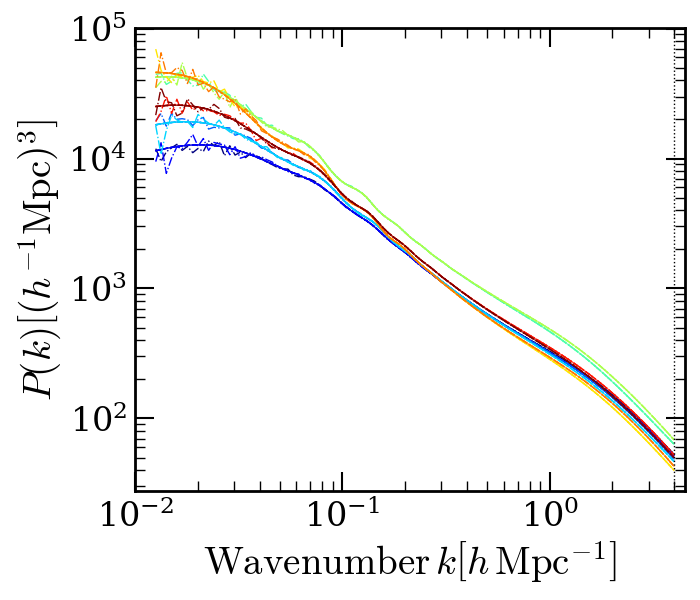

In [12]:
fig, ax = mpl.pyplot.subplots(1,1,figsize=(7,6))
ax.set_ylabel(r'$P(k) \left[ \left(h^{-1} \mathrm{Mpc}\right)^{3} \right]$')
ax.set_xlabel(r'$\mathrm{Wavenumber}\, k \left[ h\, \mathrm{Mpc}^{-1} \right]$')

colors = cl_inference.plot_utils.get_N_colors(batch_size*NN_augs_batch, mpl.colormaps['jet'])
for ii_cosmo, index_cosmo in enumerate(indexes_cosmo):
    for ii_aug, index_aug in enumerate(indexes_augs[ii_cosmo]):
        
        baccoemu_params.update({
            'omega_cold'    : theta_batch[ii_cosmo, 0],
            'omega_baryon'  : theta_batch[ii_cosmo, 1],
            'hubble'        : theta_batch[ii_cosmo, 2],
            'ns'            : theta_batch[ii_cosmo, 3],
            'sigma8_cold'   : theta_batch[ii_cosmo, 4],
            'M_c'           : aug_params_batch[ii_cosmo, ii_aug, 0],
            'eta'           : aug_params_batch[ii_cosmo, ii_aug, 1],
            'beta'          : aug_params_batch[ii_cosmo, ii_aug, 2],
            'M1_z0_cen'     : aug_params_batch[ii_cosmo, ii_aug, 3],
            'theta_out'     : aug_params_batch[ii_cosmo, ii_aug, 4],
            'theta_inn'     : aug_params_batch[ii_cosmo, ii_aug, 5],
            'M_inn'         : aug_params_batch[ii_cosmo, ii_aug, 6]
        })
        _, pk = emulator.get_nonlinear_pk(k=kk, cold=False, baryonic_boost=True, **baccoemu_params)
        ax.plot(
            np.array(kk), pk,
            c=colors[ii_cosmo*NN_augs_batch+ii_aug], linestyle='-', lw=1., marker=None, ms=2, alpha=0.7
        )
        
        ax.plot(
            np.array(kk), 10**loaded_xx[index_cosmo][index_aug],
            c=colors[ii_cosmo*NN_augs_batch+ii_aug], linestyle='--', lw=1., marker=None, ms=2
        )
        
        ax.plot(
            np.array(kk), 10**dset.xx[index_cosmo][index_aug],
            c=colors[ii_cosmo*NN_augs_batch+ii_aug], linestyle=':', lw=1., marker=None, ms=2
        )
        
        ax.plot(
            np.array(kk), 10**xx_batch[ii_cosmo, ii_aug],
            c=colors[ii_cosmo*NN_augs_batch+ii_aug], linestyle='-.', lw=1, marker=None, ms=2
        )
        
ax.axvline(10**kmax, c='k', ls=':', lw=1)        
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([0.01, 4.5])
# ax.set_ylim([40., 70000])
plt.tight_layout()
plt.show()

# Test normalization

In [13]:
normalize=True
path_save_norm = path_save_root
path_load_norm = None

NN_augs_batch = 2
add_noise_Pk="cosmic_var_gauss"

dset = cl_inference.data_tools.data_loader(
    loaded_theta,
    loaded_xx,
    aug_params = loaded_aug_params,
    normalize=normalize,
    path_save_norm=path_save_norm,
    path_load_norm=path_load_norm,
    NN_augs_batch=NN_augs_batch,
    add_noise_Pk=add_noise_Pk,
    kmax=kmax,
)

In [14]:
print("dset.norm_mean.shape ----> ", dset.norm_mean.shape)
print("dset.norm_std.shape ----> ", dset.norm_std.shape)
print("dset.xx.shape ----> ", dset.xx.shape)
print("dset.theta.shape ----> ", dset.theta.shape)
print("dset.NN_augs_batch ----> ", dset.NN_augs_batch)

dset.norm_mean.shape ---->  (99,)
dset.norm_std.shape ---->  (99,)
dset.xx.shape ---->  (2048, 2, 99)
dset.theta.shape ---->  (2048, 5)
dset.NN_augs_batch ---->  2


##### Extract some examples from the dataloader to plot

In [15]:
batch_size = 5
seed = 3
return_indexes_sampled=True
indexes_cosmo=None
indexes_augs=None
use_all_dataset_augs_ordered=False
to_torch=False
device="cpu"

theta_batch, xx_batch, aug_params_batch, indexes_cosmo, indexes_augs = dset(
    batch_size=batch_size,
    seed=seed,
    return_indexes_sampled=return_indexes_sampled,
    indexes_cosmo=indexes_cosmo,
    indexes_augs=indexes_augs,
    use_all_dataset_augs_ordered=use_all_dataset_augs_ordered,
    to_torch=to_torch,
    device=device,
    box=box
)

In [16]:
print("theta_batch.shape ----> ", theta_batch.shape)
print("xx_batch.shape ----> ", xx_batch.shape)
print("aug_params_batch.shape ----> ", aug_params_batch.shape)
print("indexes_cosmo ----> ", indexes_cosmo)
print("indexes_augs ----> ", indexes_augs)

theta_batch.shape ---->  (5, 5)
xx_batch.shape ---->  (5, 2, 99)
aug_params_batch.shape ---->  (5, 2, 7)
indexes_cosmo ---->  [ 756  581 1476  400 1455]
indexes_augs ---->  [[1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]]


<IPython.core.display.Javascript object>


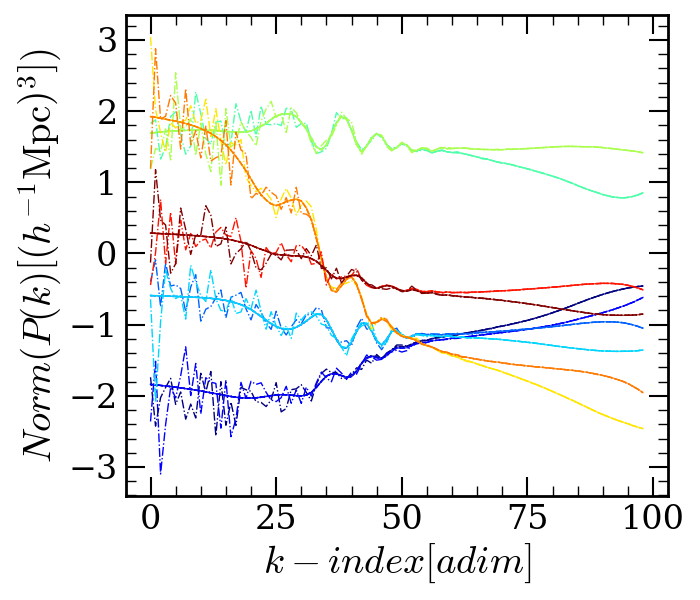

In [17]:
fig, ax = mpl.pyplot.subplots(1,1,figsize=(7,6))
ax.set_ylabel(r'$Norm(P(k) \left[ \left(h^{-1} \mathrm{Mpc}\right)^{3} \right])$')
ax.set_xlabel(r'$k - index [adim]$')

colors = cl_inference.plot_utils.get_N_colors(batch_size*NN_augs_batch, mpl.colormaps['jet'])
for ii_cosmo, index_cosmo in enumerate(indexes_cosmo):
    for ii_aug, index_aug in enumerate(indexes_augs[ii_cosmo]):

        baccoemu_params.update({
            'omega_cold'    : theta_batch[ii_cosmo, 0],
            'omega_baryon'  : theta_batch[ii_cosmo, 1],
            'hubble'        : theta_batch[ii_cosmo, 2],
            'ns'            : theta_batch[ii_cosmo, 3],
            'sigma8_cold'   : theta_batch[ii_cosmo, 4],
            'M_c'           : aug_params_batch[ii_cosmo, ii_aug, 0],
            'eta'           : aug_params_batch[ii_cosmo, ii_aug, 1],
            'beta'          : aug_params_batch[ii_cosmo, ii_aug, 2],
            'M1_z0_cen'     : aug_params_batch[ii_cosmo, ii_aug, 3],
            'theta_out'     : aug_params_batch[ii_cosmo, ii_aug, 4],
            'theta_inn'     : aug_params_batch[ii_cosmo, ii_aug, 5],
            'M_inn'         : aug_params_batch[ii_cosmo, ii_aug, 6]
        })
        _, pk = emulator.get_nonlinear_pk(k=kk, cold=False, baryonic_boost=True, **baccoemu_params)
        ax.plot(
            np.arange(pk.shape[-1]), (np.log10(pk) - dset.norm_mean ) / dset.norm_std,
            c=colors[ii_cosmo*NN_augs_batch+ii_aug], linestyle='-', lw=1., marker=None, ms=2, alpha=0.7
        )
        
        ax.plot(
            np.arange(xx_batch.shape[-1]), (loaded_xx[index_cosmo][index_aug] - dset.norm_mean ) / dset.norm_std,
            c=colors[ii_cosmo*NN_augs_batch+ii_aug], linestyle='--', lw=1., marker=None, ms=2
        )
        
        ax.plot(
            np.arange(xx_batch.shape[-1]), dset.xx[index_cosmo][index_aug],
            c=colors[ii_cosmo*NN_augs_batch+ii_aug], linestyle=':', lw=1., marker=None, ms=2
        )
        
        ax.plot(
            np.arange(xx_batch.shape[-1]), xx_batch[ii_cosmo, ii_aug],
            c=colors[ii_cosmo*NN_augs_batch+ii_aug], linestyle='-.', lw=1, marker=None, ms=2
        )
        
plt.tight_layout()
plt.show()

# Test use_all_dataset_augs_ordered mode=True and to_torch=True

In [18]:
batch_size = 0
seed = 0
return_indexes_sampled=True
indexes_cosmo=None
indexes_augs=None
use_all_dataset_augs_ordered=True
to_torch=True
device="cpu"

theta_batch, xx_batch, aug_params_batch, indexes_cosmo, indexes_augs = dset(
    batch_size=batch_size,
    seed=seed,
    return_indexes_sampled=return_indexes_sampled,
    indexes_cosmo=indexes_cosmo,
    indexes_augs=indexes_augs,
    use_all_dataset_augs_ordered=use_all_dataset_augs_ordered,
    to_torch=to_torch,
    device=device
)

In [19]:
print("theta_batch.shape ----> ", theta_batch.shape)
print("xx_batch.shape ----> ", xx_batch.shape)
print("aug_params_batch.shape ----> ", aug_params_batch.shape)
print("indexes_cosmo ----> ", indexes_cosmo)
print("indexes_augs ----> ", indexes_augs)

theta_batch.shape ---->  torch.Size([2048, 5])
xx_batch.shape ---->  torch.Size([2048, 2, 99])
aug_params_batch.shape ---->  torch.Size([2048, 2, 7])
indexes_cosmo ---->  [   0    1    2 ... 2045 2046 2047]
indexes_augs ---->  [[0 1]
 [0 1]
 [0 1]
 ...
 [0 1]
 [0 1]
 [0 1]]
